# Perform EDA to Highway Traffic Safety Data Using CRISP-DM Method

CRISP-DM stands for "Cross-industry Process for Data Mining." CRISP-DM provides a structured approach to planning a data mining project. It is a robust and well-proven methodology.

This model is an idealised sequence of events. In practice many of the tasks can be performed in a different order and it will often be necessary to backtrack to previous tasks and repeat certain actions.

## Table of Contents
**Each phase of the process:**
1. [Business understanding](#Businessunderstanding)
    1. [Assess the Current Situation](#Assessthecurrentsituation)
        1. [Inventory of resources](#Inventory)
        2. [Requirements, assumptions and constraints](#Requirements)
        3. [Risks and contingencies](#Risks)
        4. [Terminology](#Terminology)
        5. [Costs and benefits](#CostBenefit)
    2. [What are the Desired Outputs](#Desiredoutputs)
    3. [What Questions Are We Trying to Answer?](#QA)
2. [Data Understanding](#Dataunderstanding)
    1. [Initial Data Report](#Datareport)
    2. [Describe Data](#Describedata)  
    3. [Verify Data Quality](#Verifydataquality)
        1. [Missing Data](#MissingData) 
        2. [Outliers](#Outliers)
    4. [Initial Data Exploration](#Exploredata)
    5. [Data Quality Report](#Dataqualityreport)
3. [Data Preparation](#Datapreparation)
    1. [Select Your Data](#Selectyourdata)
    2. [Cleanse the Data](#Cleansethedata)
        1. [Label Encoding](#labelEncoding)
        2. [Drop Unnecessary Columns](#DropCols)
        3. [Altering Data Types](#AlteringDatatypes)
        4. [Dealing With Zeros](#DealingZeros)
        5. [Dealing With Duplicates](#DealingDuplicates)
        4. [Remove Outliers](#RemoveOutliers)
    3. [Construct Required Data](#Constructrequireddata)
    4. [Integrate Data](#Integratedata)
4. [Exploratory Data Analysis](#EDA)
5. [Modelling](#Modelling)
6. [Evaluation](#Evaluation)
7. [Deployment](#Deployment)

If you want to learn more about CRISP-DM, please refer to this link: https://www.sv-europe.com/crisp-dm-methodology/

## 1. Stage One - Determine Business Objectives and Assess the Situation  <a class="anchor" id="Businessunderstanding"></a>

### 1.1 Assess the Current Situation<a class="anchor" id="Assessthecurrentsituation"></a>

#### 1.1.1. Inventory of resources <a class="anchor" id="Inventory"></a>
List the resources available to the project including:
- Personnel:  **Kiet Vu**
- Data source: **NHTSA's Fatality Analysis Reporting System (FARS)** 
| https://www.nhtsa.gov/file-downloads?p=nhtsa/downloads/FARS/
- Computing resources: **Personal Computer**
- Software: **Jupyter Notebooks, Google Colab, and Python with associated libraries as needed**

#### 1.1.2. Requirements, assumptions and constraints - <a class="anchor" id="Requirements"></a> 
- Requirements of the project including the schedule of completion:
  **Complete the EDA within 2 weeks of the class schedule**
- Required comprehensibility and quality of results:
  **Include needed markdown comments to state and clarify action taken**
- Data security concerns as well as any legal issues. 
  **Public information with ammortization, acquired from NHSTA's Fatality Analysis Reporting System (FARS)**
- Assumptions made by the project:
      * There are more accidents happened in the urban area, where it is more populated.
      * Accidents happened mostly at night.
      * The cause of most accidents is usually because of unclear weather, which decreases a driver's visibility.
      * Number of fatality may be positively correlated with drunk driving.


- List the constraints on the project:
      *   No data dictionary is provided within the dataset, which may create misunderstandings of some attributes.
      *   Limited resources prevent deeper understandings of the significant causes to highway accidents.
      *   The data is from 2019, before the pandemic. Therefore, it can be out-dated and show incorrect result to the present.
      *   Time constraint may limit the ability to perform deeper analysis.

#### 1.1.3.Risks and contingencies <a class="anchor" id="Risks"></a>
- List the risks or events that might delay the project or cause it to fail: 
      *   Time constraint may limit the ability to perform deeper analysis.
      *   Limited understanding of the Maryland State and the driving behaviors, which may cause bias toward the analysis.
      
- What action will you take if these risks or events take place?: 
      *   Create schedule to keep up with the work.
      *   Doing a throughout research and making note as needed to understand people's driving behaviors in Maryland.

#### 1.1.4.Terminology <a class="anchor" id="Terminology"></a>
- A glossary of relevant business: \
    https://drive.google.com/file/d/1gflmBTK5cdDtJiCBXcLKLJWmnqBddhVH/view?usp=sharing
    https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/813254 (pg. 44)

#### 1.1.5.Costs and benefits  <a class="anchor" id="CostBenefit"></a>
  **TRAFFIC ACCIDENT ANALYSIS WILL ALLOW EDUCATION OF THE PUBLIC, INFORM AUTHORITIES OF TRENDS, AND ALLOW FASTER FIRST RESPONDER INITIATION**

### 1.2 What are the desired outputs of the project? <a class="anchor" id="Desiredoutputs"></a>
 
      *   Have a general knowledge about highway accidents in Maryland state.
      *   Understand the trend of accidents by hour, day of week, month, location, and weather.
      *   Analyze the correlation between number fatal crash and drunk driving.

### 1.3 What Questions Are We Trying To Answer? <a class="anchor" id="QA"></a>

**Business success criteria**
- Prevention and avoidance of future accidents.
- Understanding the accident trend on the highway of Maryland State.



**Data mining success criteria**
- Data can be used in further modeling techniques to classify and cluster accidents in multiple perspectives.
- Analyze the trend to help NHTSA encourage and advise citizens to be more mindful and attentative while driving.


**Produce project plan**
- Present the shape of the data, types of each attributes, general description such as mean, median and mode.
- Analyze the quality of the data, including missing values and outliers.
- Demonstrate the distribution and correlation of some significant and important attributes.
- Prepare and clean data by dealing with duplicates and drop any unnecessary attributes.
- Create primary dataset.
- Present the general understanding of the data.
- Evaluate significant findings in the data.
- Deploy the data for better communication of actionable solutions.

## 2. Stage  Two - Data Understanding <a class="anchor" id="Dataunderstanding"></a>

### 2.1 Initial Data Report <a class="anchor" id="Datareport"></a>
Initial data collection report - 
List the data sources acquired together with their locations, the methods used to acquire them and any problems encountered. Record problems you encountered and any resolutions achieved. This will help both with future replication of this project and with the execution of similar future projects.

In [1]:
# Import Libraries Required
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import geopandas
import folium
from folium import plugins

In [2]:
#Data source: 
#https://www.nhtsa.gov/file-downloads?p=nhtsa/downloads/FARS/

In [3]:
# Import the orginal dataset
accident_data = pd.read_csv('accident.csv',encoding_errors='ignore')
accident_data.head(5)

C:\Users\PREDATOR\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (40,42) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,STATE,STATENAME,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERSONS,PERMVIT,PERNOTMVIT,...,HOSP_MN,HOSP_MNNAME,CF1,CF1NAME,CF2,CF2NAME,CF3,CF3NAME,FATALS,DRUNK_DR
0,1,Alabama,10001,2,2,0,0,3,3,0,...,27,27,0,None,0,None,0,None,1,1
1,1,Alabama,10002,2,2,0,0,2,2,0,...,99,Unknown EMS Hospital Arrival Time,0,None,0,None,0,None,1,0
2,1,Alabama,10003,3,3,0,0,4,4,0,...,5,5,14,"Motor Vehicle struck by falling cargo,or somet...",0,None,0,None,1,0
3,1,Alabama,10004,1,1,0,1,1,1,1,...,88,Not Applicable (Not Transported),0,None,0,None,0,None,1,0
4,1,Alabama,10005,1,1,0,0,1,1,0,...,88,Not Applicable (Not Transported),0,None,0,None,0,None,1,1


## 2.2 Describe Data <a class="anchor" id="Describedata"></a>


In [4]:
# Create copy of the original data
df = accident_data.copy()

# Create new dataframe from Maryland State only
df = df.loc[df['STATENAME']=="Maryland"]

# Reset indices of the new dataframe
df = df.reset_index(drop=True)
df.index = df.index + 1

df.head(5)

,STATE,STATENAME,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERSONS,PERMVIT,PERNOTMVIT,...,HOSP_MN,HOSP_MNNAME,CF1,CF1NAME,CF2,CF2NAME,CF3,CF3NAME,FATALS,DRUNK_DR
1,24,Maryland,240001,2,2,0,1,3,3,1,...,88,Not Applicable (Not Transported),0,None,0,None,0,None,1,0
2,24,Maryland,240002,3,3,0,0,3,3,0,...,88,Not Applicable (Not Transported),0,None,0,None,0,None,1,0
3,24,Maryland,240003,2,2,0,1,4,4,1,...,99,Unknown EMS Hospital Arrival Time,0,None,0,None,0,None,1,0
4,24,Maryland,240004,1,1,0,1,1,1,1,...,99,Unknown EMS Hospital Arrival Time,0,None,0,None,0,None,1,0
5,24,Maryland,240005,2,2,0,0,2,2,0,...,88,Not Applicable (Not Transported),26,Prior Non-Recurring Incident,0,None,0,None,1,0


In [5]:
# Attributes of each record in the dataset
df.columns

Index(['STATE', 'STATENAME', 'ST_CASE', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL',
       'PEDS', 'PERSONS', 'PERMVIT', 'PERNOTMVIT', 'COUNTY', 'COUNTYNAME',
       'CITY', 'CITYNAME', 'DAY', 'DAYNAME', 'MONTH', 'MONTHNAME', 'YEAR',
       'DAY_WEEK', 'DAY_WEEKNAME', 'HOUR', 'HOURNAME', 'MINUTE', 'MINUTENAME',
       'NHS', 'NHSNAME', 'ROUTE', 'ROUTENAME', 'TWAY_ID', 'TWAY_ID2',
       'RUR_URB', 'RUR_URBNAME', 'FUNC_SYS', 'FUNC_SYSNAME', 'RD_OWNER',
       'RD_OWNERNAME', 'MILEPT', 'MILEPTNAME', 'LATITUDE', 'LATITUDENAME',
       'LONGITUD', 'LONGITUDNAME', 'SP_JUR', 'SP_JURNAME', 'HARM_EV',
       'HARM_EVNAME', 'MAN_COLL', 'MAN_COLLNAME', 'RELJCT1', 'RELJCT1NAME',
       'RELJCT2', 'RELJCT2NAME', 'TYP_INT', 'TYP_INTNAME', 'WRK_ZONE',
       'WRK_ZONENAME', 'REL_ROAD', 'REL_ROADNAME', 'LGT_COND', 'LGT_CONDNAME',
       'WEATHER1', 'WEATHER1NAME', 'WEATHER2', 'WEATHER2NAME', 'WEATHER',
       'WEATHERNAME', 'SCH_BUS', 'SCH_BUSNAME', 'RAIL', 'RAILNAME', 'NOT_HOUR',
       'NOT_HOURNAME', 'NOT

In [6]:
# Shape of the data
df.shape

(496, 91)

There are 91 attributes (columns) in the dataset with the total of 496 accidents (rows) recorded in Maryland 

In [7]:
# type of data value in each attribute
#df.dtypes
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 1 to 496
Data columns (total 91 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   STATE         496 non-null    int64  
 1   STATENAME     496 non-null    object 
 2   ST_CASE       496 non-null    int64  
 3   VE_TOTAL      496 non-null    int64  
 4   VE_FORMS      496 non-null    int64  
 5   PVH_INVL      496 non-null    int64  
 6   PEDS          496 non-null    int64  
 7   PERSONS       496 non-null    int64  
 8   PERMVIT       496 non-null    int64  
 9   PERNOTMVIT    496 non-null    int64  
 10  COUNTY        496 non-null    int64  
 11  COUNTYNAME    496 non-null    object 
 12  CITY          496 non-null    int64  
 13  CITYNAME      496 non-null    object 
 14  DAY           496 non-null    int64  
 15  DAYNAME       496 non-null    int64  
 16  MONTH         496 non-null    int64  
 17  MONTHNAME     496 non-null    object 
 18  YEAR          496 non-null    

In [8]:
# General description of each numerical attribute
df.describe(exclude='category')

,STATE,STATENAME,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERSONS,PERMVIT,PERNOTMVIT,...,HOSP_MN,HOSP_MNNAME,CF1,CF1NAME,CF2,CF2NAME,CF3,CF3NAME,FATALS,DRUNK_DR
count,496.0,496,496.000000,496.000000,496.000000,496.00000,496.000000,496.000000,496.000000,496.000000,...,496.000000,496,496.000000,496,496.000000,496,496.000000,496,496.000000,496.000000
unique,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5,NaN,10,NaN,3,NaN,3,NaN,NaN
top,NaN,Maryland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Unknown EMS Hospital Arrival Time,NaN,None,NaN,None,NaN,None,NaN,NaN
freq,NaN,496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,356,NaN,471,NaN,493,NaN,493,NaN,NaN
mean,24.0,NaN,240255.685484,1.635081,1.572581,0.06250,0.296371,2.280242,2.262097,0.314516,...,95.612903,NaN,1.421371,NaN,0.427419,NaN,0.437500,NaN,1.078629,0.288306
std,0.0,NaN,147.934294,0.952349,0.918263,0.32118,0.519194,1.847765,1.852068,0.544830,...,7.447822,NaN,7.819289,NaN,6.309747,NaN,6.335416,NaN,0.386472,0.462257
min,24.0,NaN,240001.000000,1.000000,1.000000,0.00000,0.000000,1.000000,1.000000,0.000000,...,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,1.000000,0.000000
25%,24.0,NaN,240126.750000,1.000000,1.000000,0.00000,0.000000,1.000000,1.000000,0.000000,...,88.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,1.000000,0.000000
50%,24.0,NaN,240257.500000,1.000000,1.000000,0.00000,0.000000,2.000000,2.000000,0.000000,...,99.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,1.000000,0.000000
75%,24.0,NaN,240384.250000,2.000000,2.000000,0.00000,1.000000,3.000000,3.000000,1.000000,...,99.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,1.000000,1.000000


In [9]:
# Example of the first 5 records
df.head(5)

,STATE,STATENAME,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERSONS,PERMVIT,PERNOTMVIT,...,HOSP_MN,HOSP_MNNAME,CF1,CF1NAME,CF2,CF2NAME,CF3,CF3NAME,FATALS,DRUNK_DR
1,24,Maryland,240001,2,2,0,1,3,3,1,...,88,Not Applicable (Not Transported),0,None,0,None,0,None,1,0
2,24,Maryland,240002,3,3,0,0,3,3,0,...,88,Not Applicable (Not Transported),0,None,0,None,0,None,1,0
3,24,Maryland,240003,2,2,0,1,4,4,1,...,99,Unknown EMS Hospital Arrival Time,0,None,0,None,0,None,1,0
4,24,Maryland,240004,1,1,0,1,1,1,1,...,99,Unknown EMS Hospital Arrival Time,0,None,0,None,0,None,1,0
5,24,Maryland,240005,2,2,0,0,2,2,0,...,88,Not Applicable (Not Transported),26,Prior Non-Recurring Incident,0,None,0,None,1,0


### 2.3 Verify Data Quality <a class="anchor" id="Verifydataquality"></a>

#### 2.3.1. Missing Data <a class="anchor" id="MissingData"></a>


In [10]:
# Check if there is any blank value
df.isnull().values.any()

True

In [11]:
df.isnull().sum()

STATE        0
STATENAME    0
ST_CASE      0
VE_TOTAL     0
VE_FORMS     0
            ..
CF2NAME      0
CF3          0
CF3NAME      0
FATALS       0
DRUNK_DR     0
Length: 91, dtype: int64

Since there is missing value, I will remove the attribute (column) from the data that has more than 50% of missing values. There will be no significant impact and meaningful result to the analysis if the attribute (column) has more than half of missing values.

In [12]:
# Find columns that has more than 50% of missing values
mis_val = df.isnull().sum()
mis_val_percent = 100 * df.isnull().sum() / len(df)
mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
mis_val_table_ren_columns = mis_val_table.rename(
columns = {0 : 'Missing Values', 1 : '% of Total Values'})
mis_val_table_ren_columns = mis_val_table_ren_columns[
    mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
'% of Total Values', ascending=False).round(1)
print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
    "There are " + str(mis_val_table_ren_columns.shape[0]) +
      " columns that have missing values.")
mis_val_table_ren_columns

Your selected dataframe has 91 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
TWAY_ID2,346,69.8


In [13]:
# Get the columns with > 50% missing
missing_columns = list(mis_val_table_ren_columns[mis_val_table_ren_columns['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

We will remove 1 columns.


In [14]:
# Drop the columns
df = df.drop(list(missing_columns),axis=1)

**Definition of attributes removed**

Traffic Way Identifier (TWAY_ID, TWAY_ID2)

**C10 Trafficway Identifier Definition**: This data element records the trafficway on which the crash occurred. Additional Information: Beginning in 2004 a second trafficway identifier was added to accommodate intersection and intersection-related crashes where the officer provides the identifier for the second trafficway. Prior to 2015 the Data Element ID was C13.

**SAS Name**:
TWAY_ID 1982-Later
TWAY_ID2 2004-Later

Source: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/813254

*Both TWAY_ID2 will not be considered in this analysis. Lat and Long will be used to locate instead. 

In [15]:
df.shape

(496, 90)

The data set now have only 90 attributes

In [16]:
# Checking the atributes in the dataframe again
df.columns

Index(['STATE', 'STATENAME', 'ST_CASE', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL',
       'PEDS', 'PERSONS', 'PERMVIT', 'PERNOTMVIT', 'COUNTY', 'COUNTYNAME',
       'CITY', 'CITYNAME', 'DAY', 'DAYNAME', 'MONTH', 'MONTHNAME', 'YEAR',
       'DAY_WEEK', 'DAY_WEEKNAME', 'HOUR', 'HOURNAME', 'MINUTE', 'MINUTENAME',
       'NHS', 'NHSNAME', 'ROUTE', 'ROUTENAME', 'TWAY_ID', 'RUR_URB',
       'RUR_URBNAME', 'FUNC_SYS', 'FUNC_SYSNAME', 'RD_OWNER', 'RD_OWNERNAME',
       'MILEPT', 'MILEPTNAME', 'LATITUDE', 'LATITUDENAME', 'LONGITUD',
       'LONGITUDNAME', 'SP_JUR', 'SP_JURNAME', 'HARM_EV', 'HARM_EVNAME',
       'MAN_COLL', 'MAN_COLLNAME', 'RELJCT1', 'RELJCT1NAME', 'RELJCT2',
       'RELJCT2NAME', 'TYP_INT', 'TYP_INTNAME', 'WRK_ZONE', 'WRK_ZONENAME',
       'REL_ROAD', 'REL_ROADNAME', 'LGT_COND', 'LGT_CONDNAME', 'WEATHER1',
       'WEATHER1NAME', 'WEATHER2', 'WEATHER2NAME', 'WEATHER', 'WEATHERNAME',
       'SCH_BUS', 'SCH_BUSNAME', 'RAIL', 'RAILNAME', 'NOT_HOUR',
       'NOT_HOURNAME', 'NOT_MIN', 'NOT_

#### 2.3.2. Outliers <a class="anchor" id="Outliers"></a>

**Outlier Detection Analysis**
Since this is purely a report dataset. I can only find outliers through obvious numeric attributes, such as `'Hour', 'Minute','Day', 'Month', 'Latitude', and 'Longitude'`. Boxplot and Distribution plot will help pointing out the ouliers that appeared in these atributes.

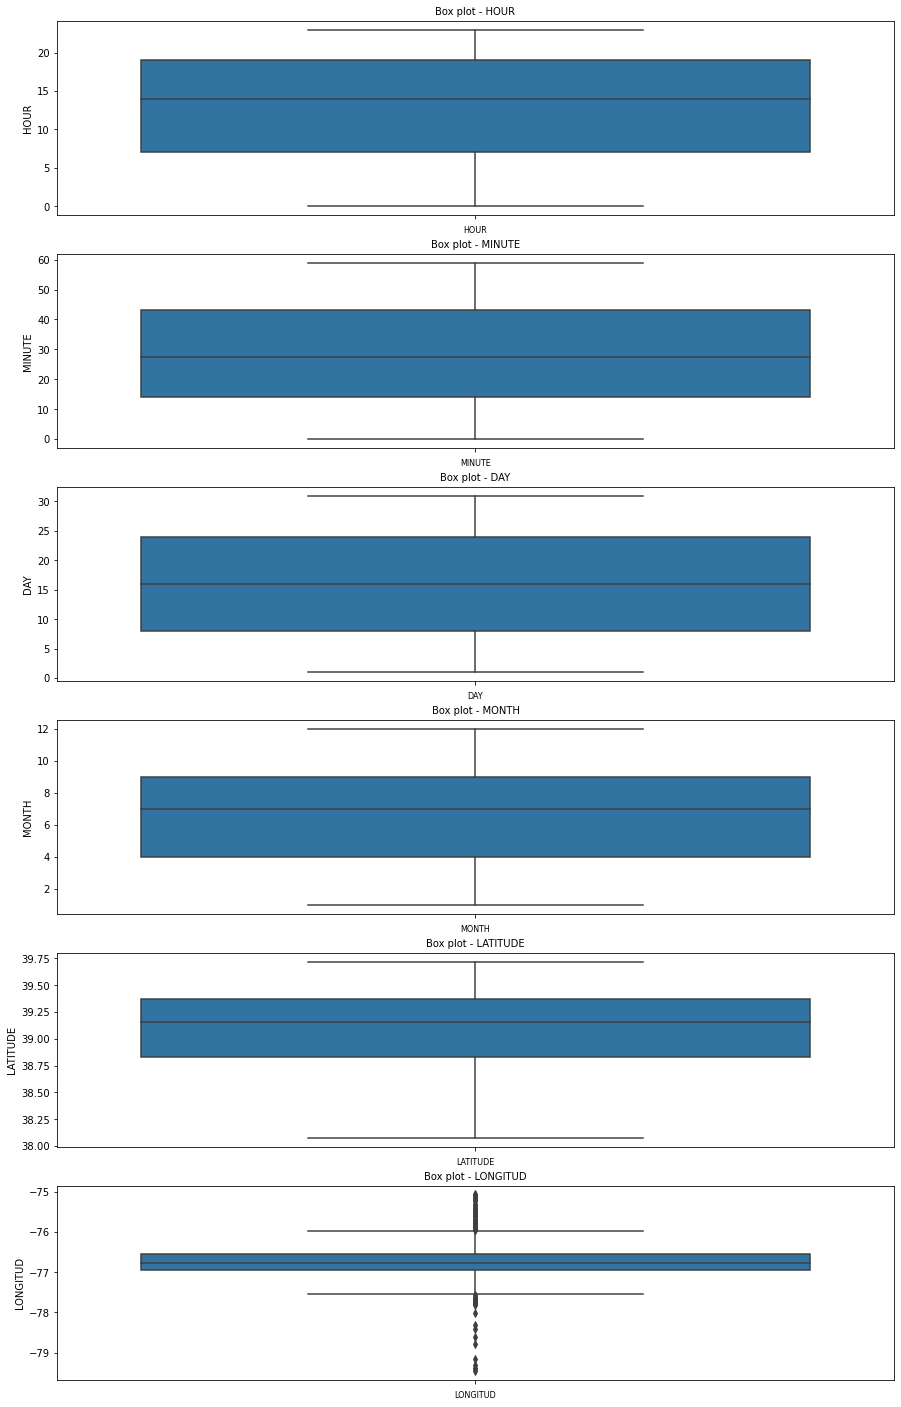

In [17]:
# Boxplot identifies the black dots are outliers in the attribute and the blue colored box is the IQR range.

col_names = ['HOUR', 'MINUTE', 'DAY', 'MONTH', 'LATITUDE', 'LONGITUD']

fig, ax = plt.subplots(len(col_names), figsize=(15,25))

for i, col_val in enumerate(col_names):
    sns.boxplot(y=df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

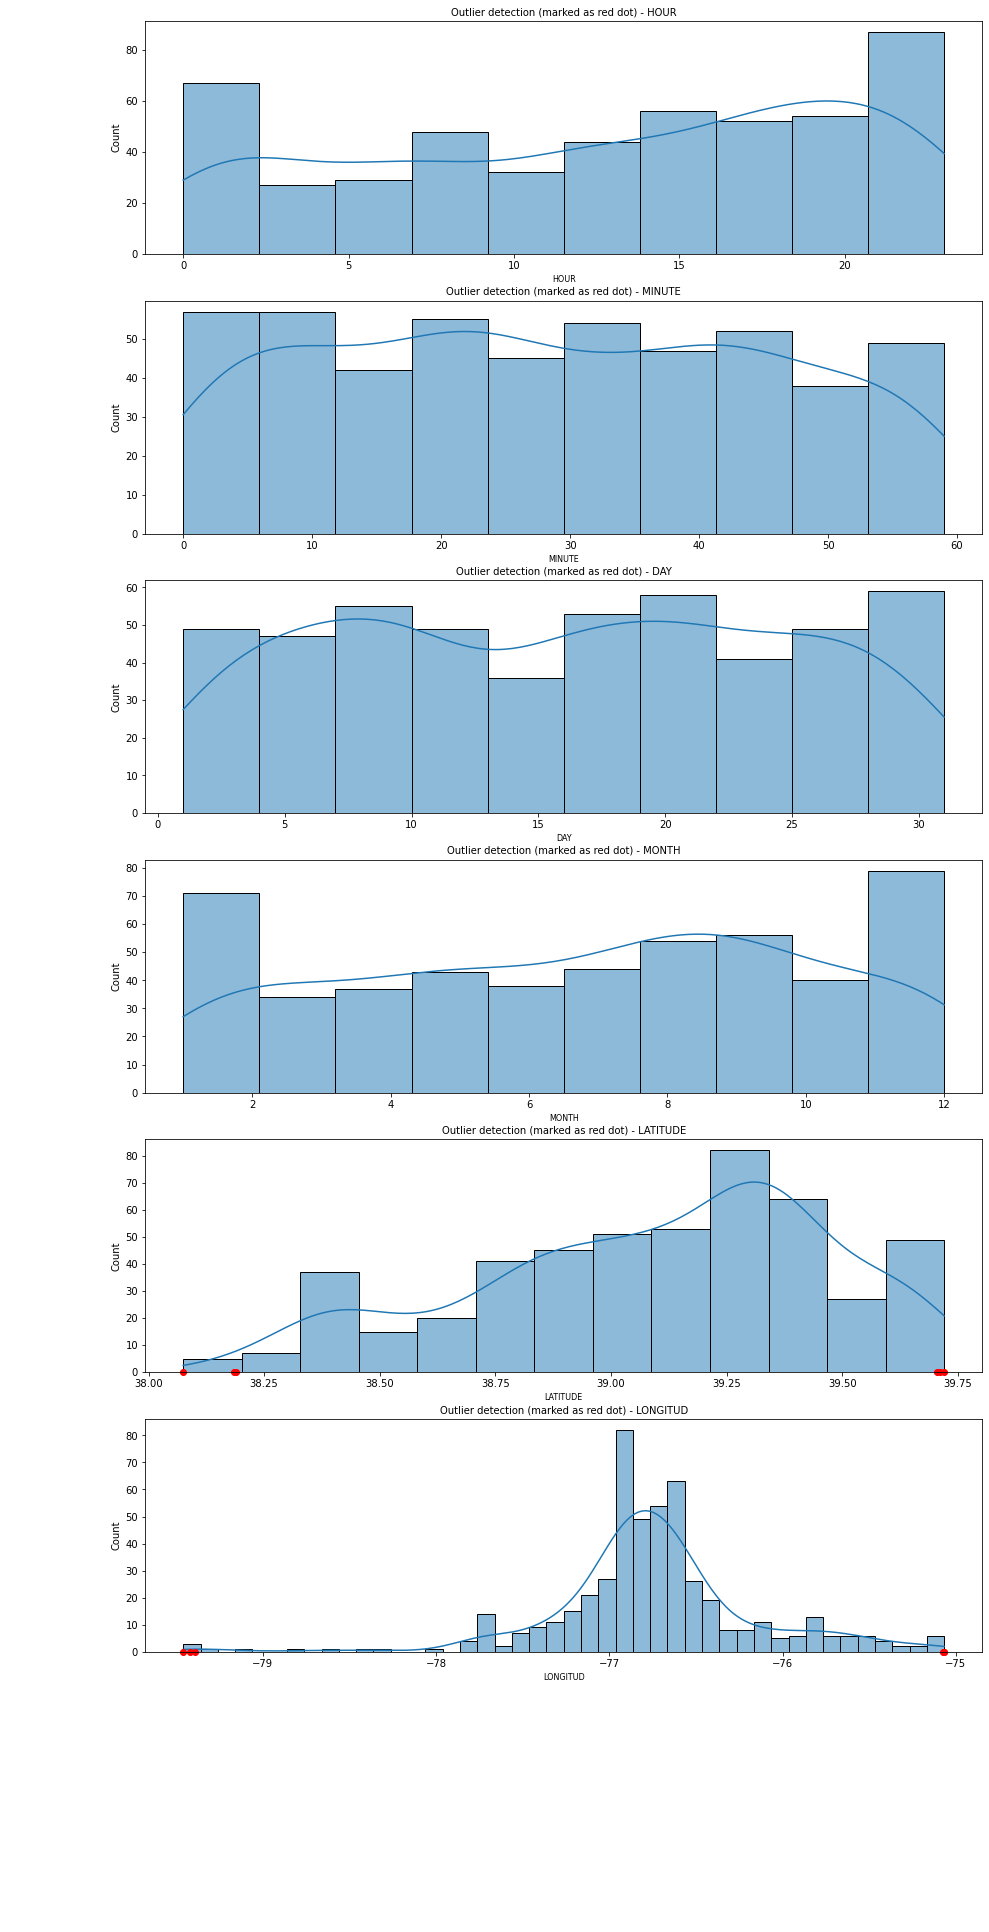

In [18]:
# Distplot identifies red dot are outliers.

# Function to plot outlier, with the threshold of 99%
def percentile_based_outlier(data, threshold=99):
    diff = (100 - threshold) / 2
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

col_names = ['HOUR', 'MINUTE', 'DAY', 'MONTH','LATITUDE', 'LONGITUD']

fig, ax = plt.subplots(len(col_names), figsize=(15,30))

# Create the plot
for i, col_val in enumerate(col_names):
    x = df[col_val][:1000]
    sns.histplot(x, kde=True, ax=ax[i])
    outliers = x[percentile_based_outlier(x)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection (marked as red dot) - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

From both the boxplot and distplot, there seems to be outliers in Longitude and Latitude. Meanwhile, the quality of the data remains good as there is no outlier in Hour and Minute atributes.

The outliers for Longtitude and Latitude can have two possiblities. Firstly, these value can be accurate locations, where may have a less likely chance for traffic accidents to appear (i.e Maryland's borders among other states, less populated area). On the other hand, the outliers can also be a mistake in the data. 

**Maryland's minimum and maximum of latitude and longitude** \
Source: https://gist.github.com/jakebathman/719e8416191ba14bb6e700fc2d5fccc5

min latitude: 37.8889 \
max latitude: 39.722 \
min longitude: -79.4861 \
max longitude: -74.8581 

### 2.4 Initial Data Exploration  <a class="anchor" id="Exploredata"></a>

#### 2.4.1 Distributions  <a class="anchor" id="Distributions"></a>

As stated in the first section, I will analyze the trends, or the distributions of some attributes that are related to my assumption. 

Firstly, I will analyze the categorical attributes to see the trend of the number of cases in county, the day of week, number of fatals, the difference in rural and urban area, the condition of the weather, and number of pedestrians involved.

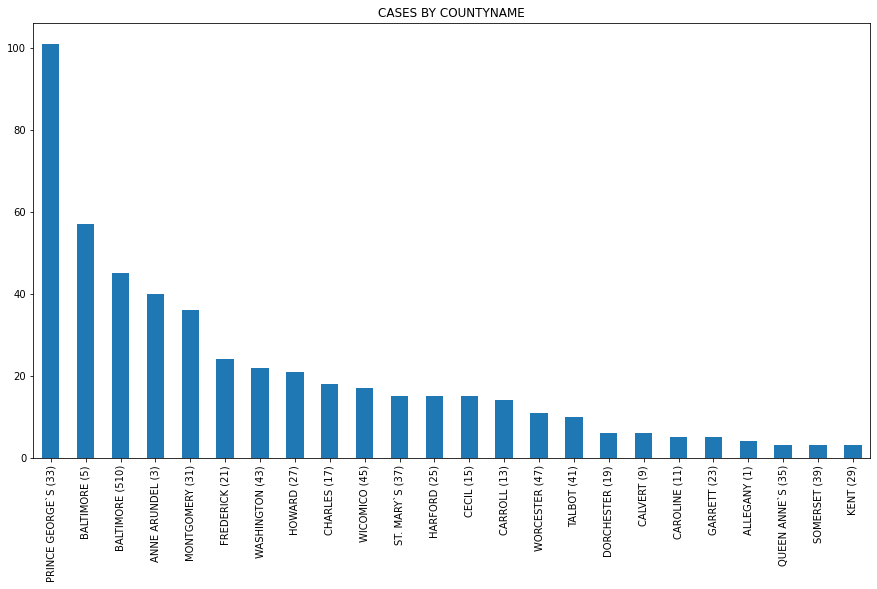

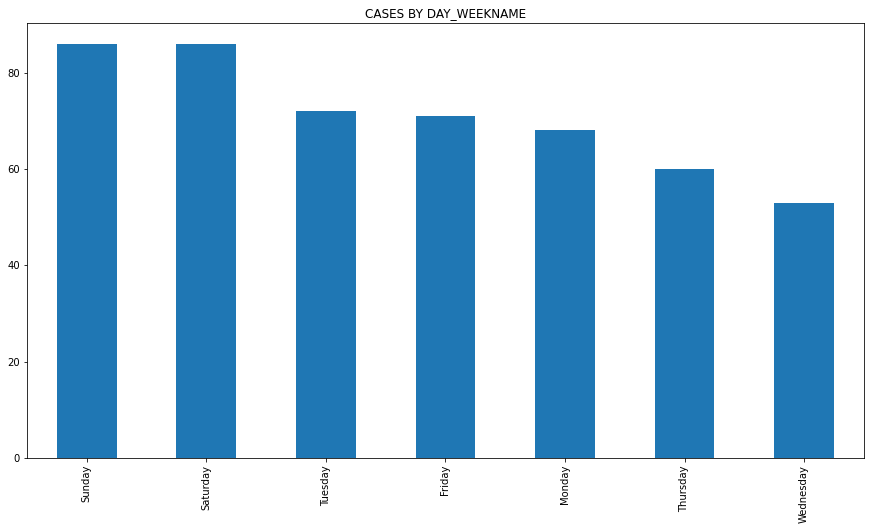

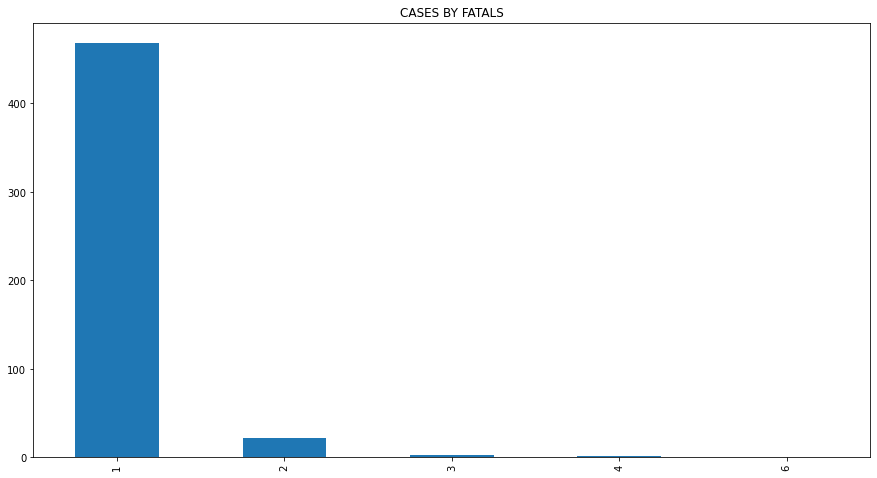

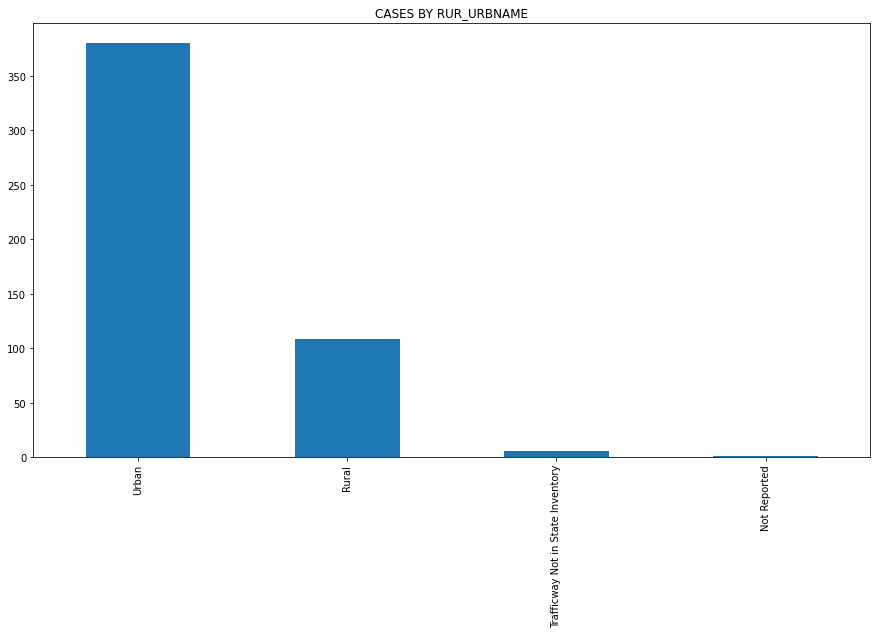

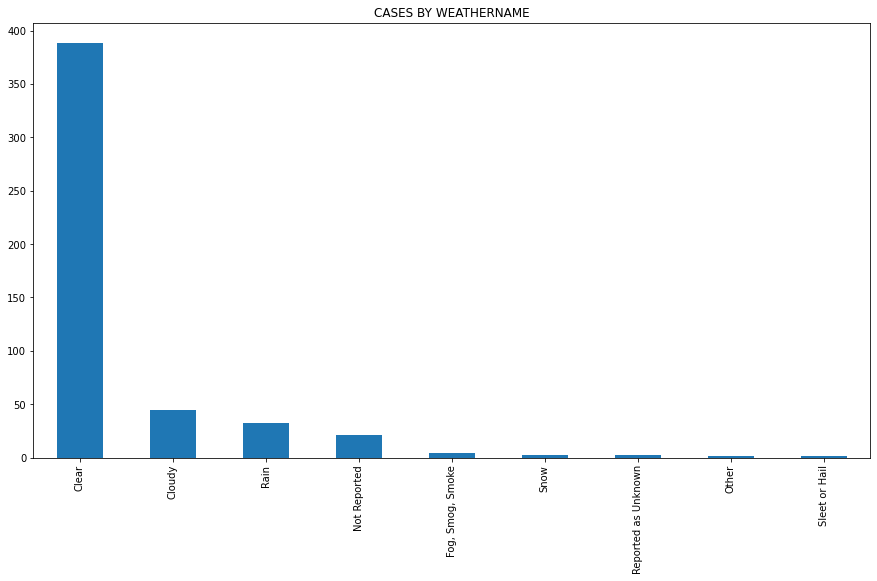

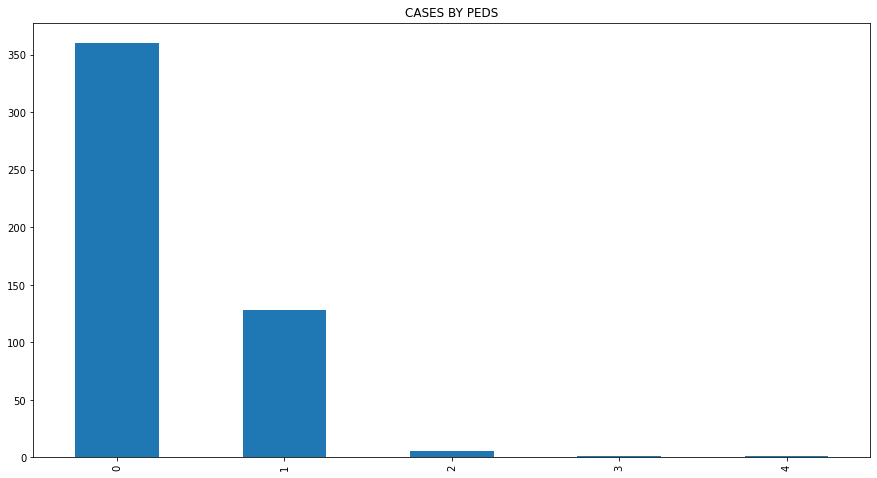

In [19]:
# Categorical columns plot
col_names = ['COUNTYNAME','DAY_WEEKNAME','FATALS','RUR_URBNAME','WEATHERNAME','PEDS']

for col_val in col_names:
    plt.figure(figsize=[15,8])
    df[col_val].value_counts().plot.bar(title=f'CASES BY {col_val}')

From the historgrams, it is clearly that Prince Geogre's county has almost 20% of total cases, following by Baltimore county. In addition, 80% of total accidents happened in the urban area. Therefore, my assumption is true. Most traffic accidents happened in populated location, or the urban areas.

Moreover, the number of cases increase on Saturdat and Sunday.

Based on the data, there are 90% of the accidents have only 1 fatal. Interestingly, 25% of cases involving at least 1 pedestrian.

For my third assumption, however, the truth is that most accidents happened when the weather was clear, which hold almost 75% of the total observations.

From the analysis, most cases happened in the evening and at nigh, during 4:30pm to 3am the next day.

Thus, the number of trafic accident increase from December to January, which are the holidays. It also increase in June, the start of the summer. However, accidents are less likely to occur in the middle of the month.

Using Bivariate distribution plots, I want to analyze whether these attributes correlated to each other or not. 

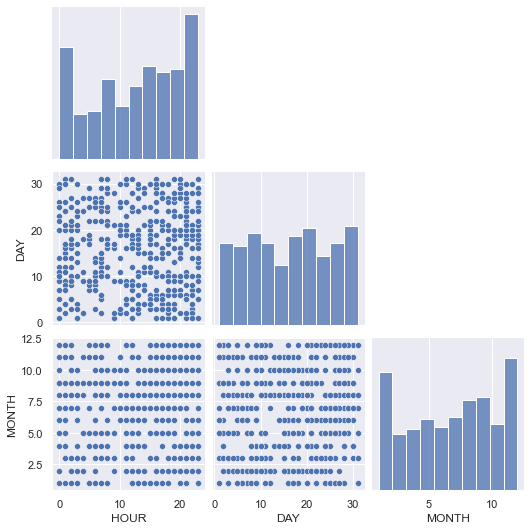

In [40]:
#Bivariate distribution plots
col_names = ['HOUR','DAY','MONTH']
sns.pairplot(df[col_names], diag_kind='hist', corner = True)

The graph above does looks like the map of Maryland, which indicated most coordinate are correct. There is no clear bivariate distribution among these attributes.

#### 2.4.2 Correlations  <a class="anchor" id="Correlations"></a>

As there no clear correlations among Hour, Day, Month, Latitude, and Longitud, I will examine them with drunk driving and the number of fatals.

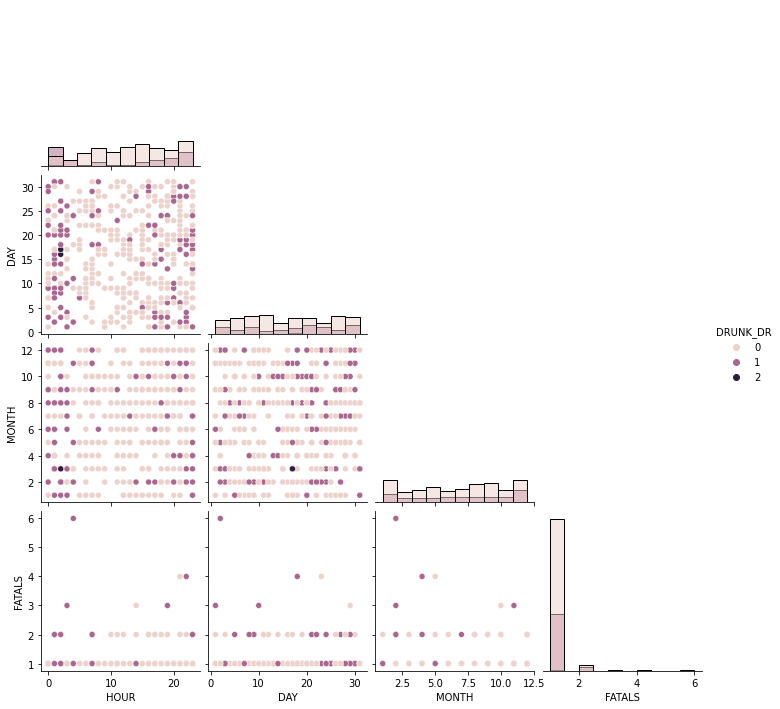

In [21]:
# Multi correlations of drunk drive by Hour, Day of Month, Month, and number of fatals 
col_names = ['HOUR','DAY','MONTH', 'FATALS' ,'DRUNK_DR']
sns.pairplot(df[col_names], hue ='DRUNK_DR', diag_kind='hist', corner = True)

Indeed, drunk driving and fatal crashes happened a lot more at night.

However, eventhough the high amount of fatals is somewhat positive correlated to drunk driving, there is not enough evidence to prove my fourth hypothesis.

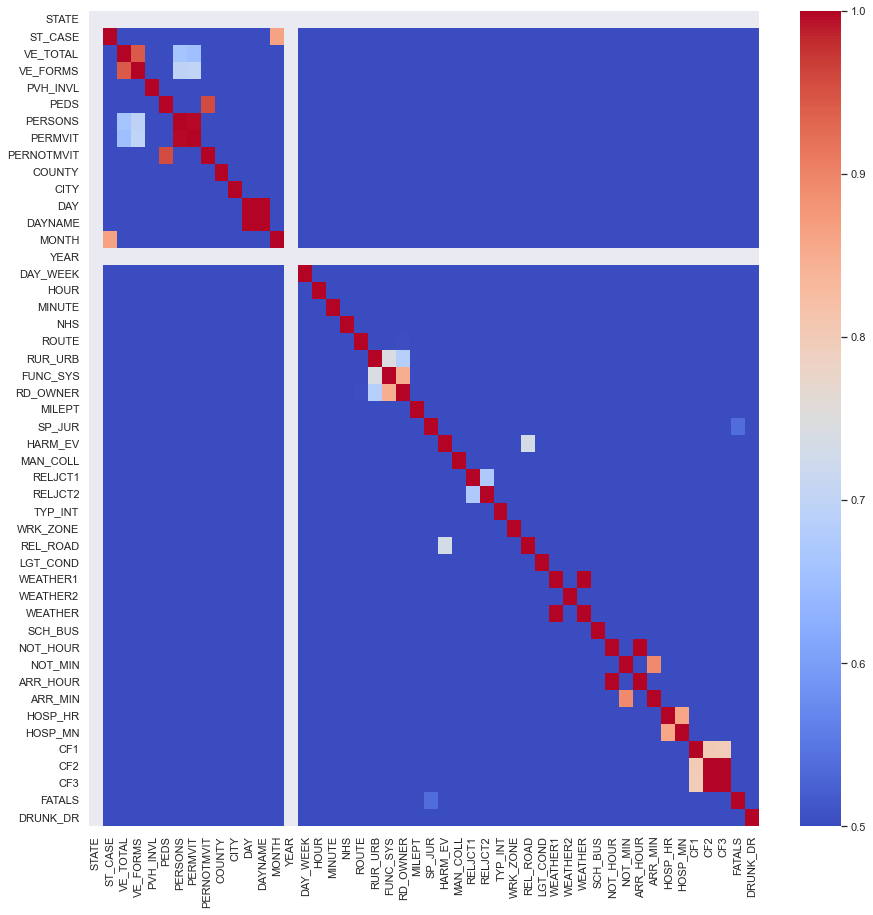

In [22]:
# Chosing only numerical values
numerics = ['int16', 'int32', 'int64']
dfnums=df.select_dtypes(include=numerics)
dfnums.corr()

# Correlations matrix heat map
sns.set (rc = {'figure.figsize':(15, 15)})
sns.heatmap(dfnums.corr(),cmap='coolwarm',vmin=.5)
plt.show()

There is no clear and significant correlation among all attributes.

### 2.5 Data Quality Report <a class="anchor" id="Dataqualityreport"></a>

**Data Quality**:

      *   The data is completed.
      *   There is no outlier that significantly impact the data.
      *   Most of the attributes are categorical, there is not much use for statistical analyses.

**Problems**:
  
      *   Only one column has more than 50% of missing value. <- Performed dropping the column
      *   Data redundancy - Lots of duplicate attributes. <- drop any duplicate attributes and keep the first
      *   Unneccessary label encoding for numeric attributes. <- drop any numeric attributes that is label encoded.
      *   Some value reported as unknown, or others. <- since they are not affecting my analysis, I will keep these value in my dataframe for further analysis. 

## 3. Stage Three - Data Preperation <a class="anchor" id="Datapreperation"></a>


### 3.1 Select Your Data <a class="anchor" id="Selectyourdata"></a>

**Exclusion**:

    * Unnecessary label encoding for numeric atributes:
          LATITUDENAME LONGITUDNAME HOURNAME DAYNAME MINUTENAME

    * Insignificant attributes:
          CF3 CF2 CF3NAME CF2NAME ARR_HOUR ARR_MIN WEATHER1NAME WEATHER2NAME WEATHER1 WEATHER2

### 3.2 Clean The Data <a class="anchor" id="Cleansethedata"></a>

#### 3.2.1 Label Encoding <a class="anchor" id="labelEncoding"></a>
Since the all attributes have been label encoded, there is no action needed.

#### 3.2.2 Drop Unnecessary Columns <a class="anchor" id="DropCols"></a>
Sometimes we may not need certain columns. We can drop to keep only relevent data

In [23]:
del_col_list = ['CF3', 'CF2', 'CF3NAME', 'CF2NAME', 'ARR_HOUR', 'ARR_MIN', 'WEATHER1NAME', 'WEATHER2NAME', 
                'WEATHER1', 'WEATHER2', 'LATITUDENAME', 'LONGITUDNAME', 'HOURNAME', 'DAYNAME', 'MINUTENAME']

df = df.drop(del_col_list, axis=1)
df.head(5)

,STATE,STATENAME,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERSONS,PERMVIT,PERNOTMVIT,...,ARR_HOURNAME,ARR_MINNAME,HOSP_HR,HOSP_HRNAME,HOSP_MN,HOSP_MNNAME,CF1,CF1NAME,FATALS,DRUNK_DR
1,24,Maryland,240001,2,2,0,1,3,3,1,...,Unknown EMS Scene Arrival Hour,Unknown EMS Scene Arrival Minutes,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),0,None,1,0
2,24,Maryland,240002,3,3,0,0,3,3,0,...,Unknown EMS Scene Arrival Hour,Unknown EMS Scene Arrival Minutes,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),0,None,1,0
3,24,Maryland,240003,2,2,0,1,4,4,1,...,Unknown EMS Scene Arrival Hour,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,0,None,1,0
4,24,Maryland,240004,1,1,0,1,1,1,1,...,Unknown EMS Scene Arrival Hour,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,0,None,1,0
5,24,Maryland,240005,2,2,0,0,2,2,0,...,Unknown EMS Scene Arrival Hour,Unknown EMS Scene Arrival Minutes,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),26,Prior Non-Recurring Incident,1,0


We now have only 75 attributes/columns

#### 3.2.3 Altering Data Types <a class="anchor" id="AlteringDatatypes"></a>
Most data are categorical, there is no action needed for altering data types 

#### 3.2.4 Dealing With Zeros <a class="anchor" id="DealingZeros"></a>

There is no zero that is impactful to the data analysis process. Most zeros are label encoding of categorical attributes.

#### 3.2.5 Dealing With Duplicates <a class="anchor" id="DealingDuplicates"></a>

In [24]:
# remove any duplicated record
df = df.drop_duplicates(keep='first')
df.shape

(496, 75)

There is no duplicated record in this dataset as the number of record did not change.

#### 3.2.6 Remove Outliers

As stated above, as `'MINUTE', 'HOUR', 'DAY', 'MONTH', 'LATITUDE', and 'LONGITUD'` have outliers, we will remove those without much skewness to out analysis due to the large sample size. 

In [25]:
pd.options.display.float_format = '{:.2f}'.format  # suppress unwanted decimal points in latitude and longitude
df[['HOUR','MINUTE','DAY','MONTH','LATITUDE','LONGITUD']].describe(percentiles=[.01,.05,.1,.25,.5,.9,.95, .99,.999])

,HOUR,MINUTE,DAY,MONTH,LATITUDE,LONGITUD
count,496.00,496.00,496.00,496.00,496.00,496.00
mean,12.71,28.43,15.84,6.77,39.09,-76.74
std,7.30,17.48,8.89,3.33,0.38,0.60
min,0.00,0.00,1.00,1.00,38.08,-79.46
1%,0.00,0.00,1.00,1.00,38.20,-78.80
5%,0.75,1.75,2.00,1.00,38.38,-77.69
10%,2.00,4.00,4.00,2.00,38.47,-77.33
25%,7.00,14.00,8.00,4.00,38.83,-76.95
50%,14.00,27.50,16.00,7.00,39.16,-76.77
90%,22.00,53.00,28.00,11.00,39.59,-75.94


Below 1% and above 99%, we have outliers for latitude and longitude, which located outsides of the Four Conners, therefore we will remove those, along with the outliers in hour and minute. 

In [26]:
# Boder coordinate of Maryland
min_lat= 37.8889
max_lat = 39.722
min_longit = -79.4861
max_longit = -74.8581 

# Perform removing outlier
df = df[df.apply(lambda row: (0<=row['MINUTE']<=59) and (0<=row['HOUR']<=23) and (min_lat<=row['LATITUDE']<= max_lat) and (min_longit<=row['LONGITUD']<=max_longit), axis=1) ]
df[['MINUTE','HOUR','LATITUDE','LONGITUD']].describe(percentiles=[.01,.05,.1,.25,.5,.9,.95,.99])

,MINUTE,HOUR,LATITUDE,LONGITUD
count,496.00,496.00,496.00,496.00
mean,28.43,12.71,39.09,-76.74
std,17.48,7.30,0.38,0.60
min,0.00,0.00,38.08,-79.46
1%,0.00,0.00,38.20,-78.80
5%,1.75,0.75,38.38,-77.69
10%,4.00,2.00,38.47,-77.33
25%,14.00,7.00,38.83,-76.95
50%,27.50,14.00,39.16,-76.77
90%,53.00,22.00,39.59,-75.94


In [27]:
print(f'The dataframe is now having {len(df)} records')

The dataframe is now having 496 records


### 3.3 Construct Required Data   <a class="anchor" id="Constructrequireddata"></a>
**Derived attributes** 

Create new datetime column that include year, month, day, hour, and minute for better access.

In [28]:
# join HOUR, MINUTE, YEAR, MONTH, DAY
df['DATETIME'] = pd.to_datetime(df[['YEAR', 'MONTH','DAY','HOUR','MINUTE']],format='%m-%d-%Y%H:%M')
df

,STATE,STATENAME,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERSONS,PERMVIT,PERNOTMVIT,...,ARR_MINNAME,HOSP_HR,HOSP_HRNAME,HOSP_MN,HOSP_MNNAME,CF1,CF1NAME,FATALS,DRUNK_DR,DATETIME
1,24,Maryland,240001,2,2,0,1,3,3,1,...,Unknown EMS Scene Arrival Minutes,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),0,None,1,0,2019-01-07 05:55:00
2,24,Maryland,240002,3,3,0,0,3,3,0,...,Unknown EMS Scene Arrival Minutes,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),0,None,1,0,2019-01-03 06:43:00
3,24,Maryland,240003,2,2,0,1,4,4,1,...,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,0,None,1,0,2019-01-06 15:30:00
4,24,Maryland,240004,1,1,0,1,1,1,1,...,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,0,None,1,0,2019-01-01 12:21:00
5,24,Maryland,240005,2,2,0,0,2,2,0,...,Unknown EMS Scene Arrival Minutes,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),26,Prior Non-Recurring Incident,1,0,2019-01-05 23:39:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,24,Maryland,240506,2,2,0,0,2,2,0,...,Unknown EMS Scene Arrival Minutes,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),0,None,1,1,2019-10-28 14:08:00
493,24,Maryland,240507,2,2,0,0,3,3,0,...,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,0,None,1,0,2019-08-18 13:37:00
494,24,Maryland,240508,1,1,0,0,2,2,0,...,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,0,None,1,0,2019-12-22 23:37:00
495,24,Maryland,240509,1,1,0,0,1,1,0,...,Unknown EMS Scene Arrival Minutes,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),0,None,1,0,2019-10-27 17:07:00


### 3.4 Integrate Data  <a class="anchor" id="Integratedata"></a>
Not needed in this analysis

### 3.5 Construct Our Primary Data Set

In [29]:
df.to_csv('accident_Maryland.csv', index=False)

## 4. Stage Four - Exploratory Data Analysis

In this stage, I will perform deeper analysis, aside from the "Initial Data Exploration", using the prepared dataset 

Most cases weren't around the city area, therefore I will exclude them from the visualization

<AxesSubplot:title={'center':'CASES BY CITY'}>

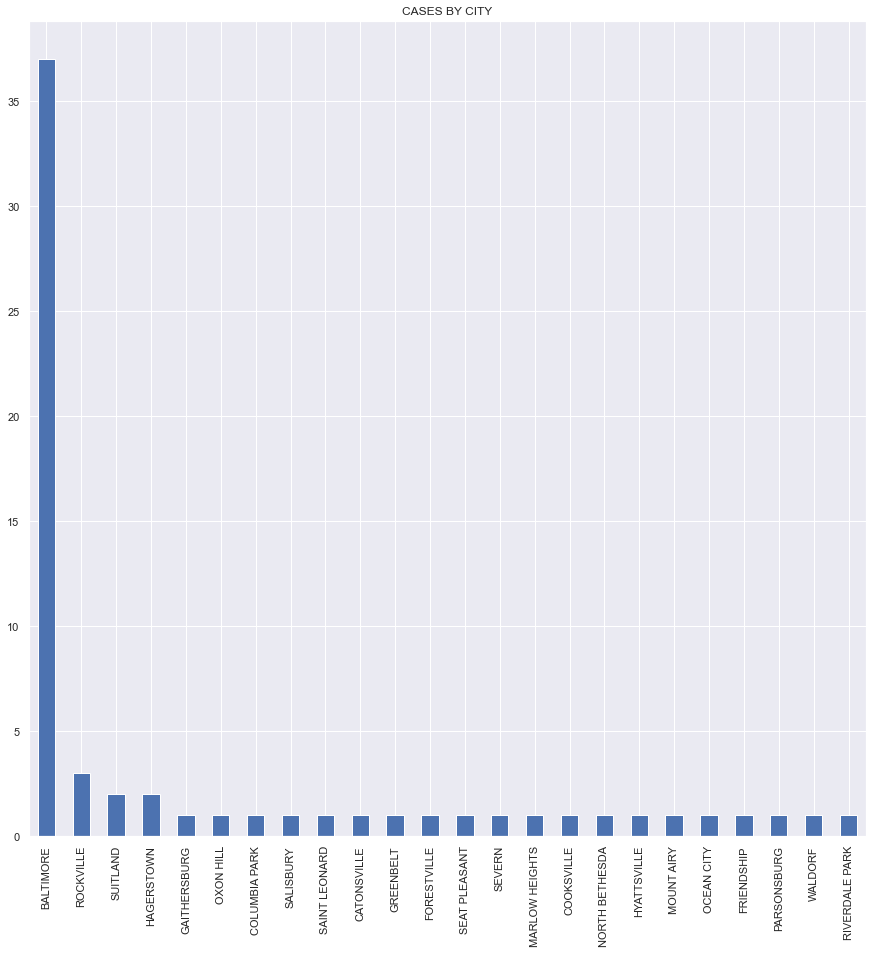

In [30]:
# Distribution by city
accident_city = df.loc[df['CITY']!=0]
accident_city['CITYNAME'].value_counts().plot.bar(title='CASES BY CITY')

Most accident are in the Baltimore city, which is a very populated area.

<AxesSubplot:title={'center':'CASES BY INTERSECTION'}>

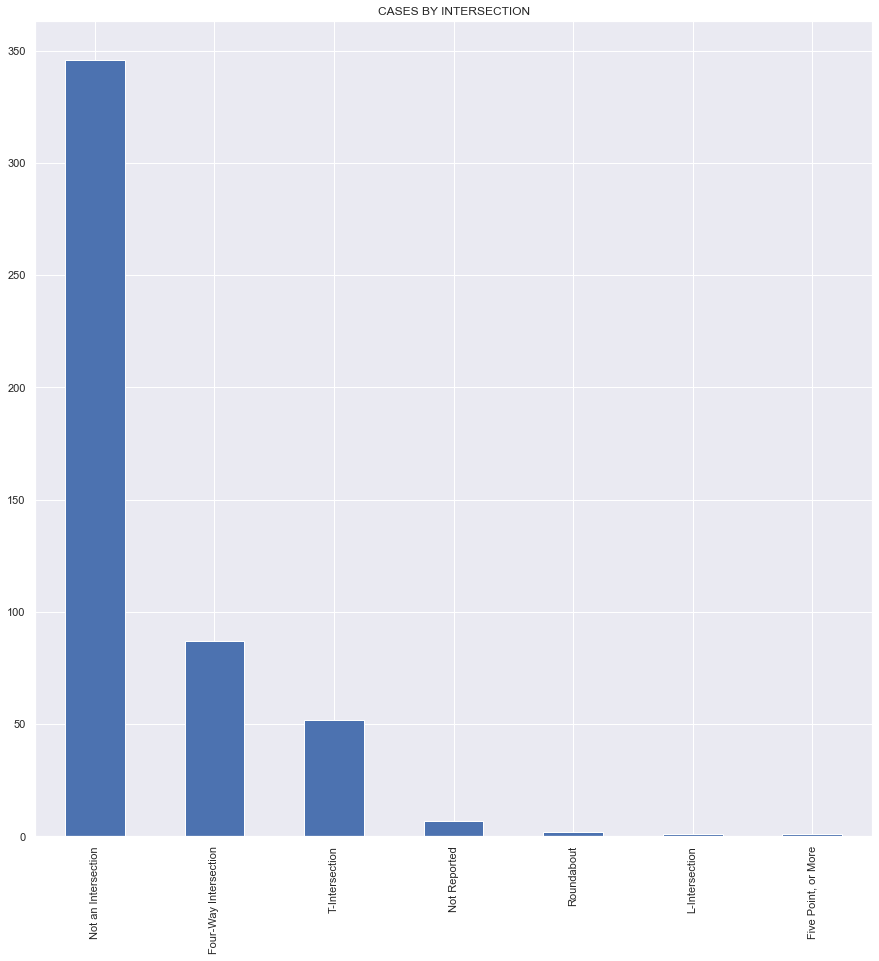

In [31]:
# Distribution by type of intersection
df['TYP_INTNAME'].value_counts().plot.bar(title='CASES BY INTERSECTION')

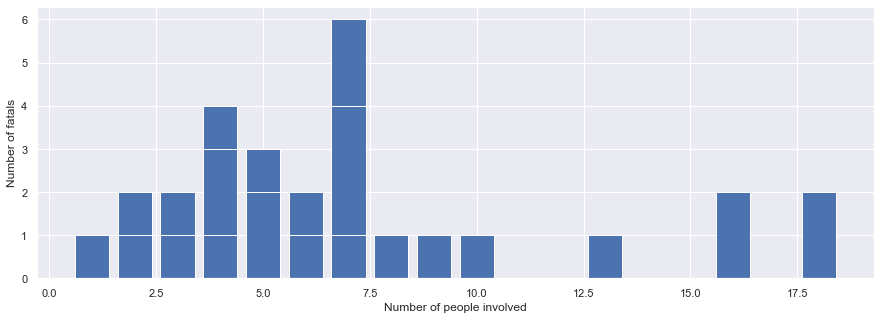

In [32]:
# Number of people involve with number of fatality in a fatal crash
plt.subplots(figsize = (15,5))

plt.bar(df['PERSONS'],df['FATALS'])
plt.xlabel("Number of people involved")
plt.ylabel("Number of fatals")
plt.show()

We also identify the distribution behind each fatal crash based on the report. However, since there are some records that have no reason, I will exclude those from the visualization.

In [35]:
# Sample size of accidents that have no reason
df[df['CF1'] == 0]['CF1NAME']
no_reason = df.loc[df['CF1'] ==0]
print(f'There are {len(no_reason)} cases that have no underlying reason')

There are 471 cases that have no underlying reason


In [37]:
# Sample size of accidents that have reason
accident_reason = df.loc[df['CF1'] != 0]
print(f'There are {len(accident_reason)} cases that have underlying reason')

There are 25 cases that have underlying reason


<AxesSubplot:title={'center':'REASON FOR ACCIDENTS'}>

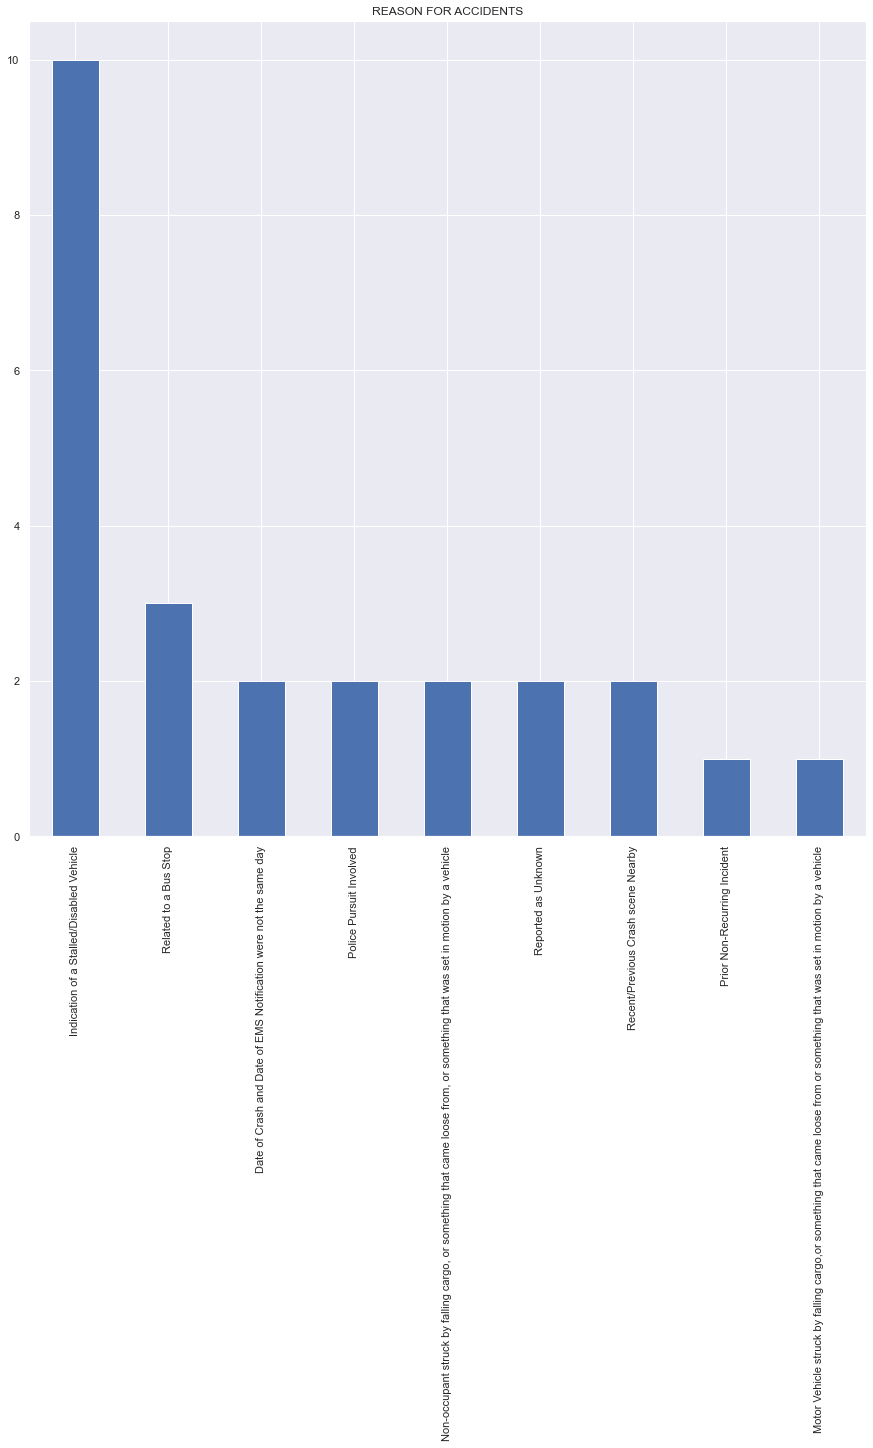

In [38]:
# Distribution behind each fatal crash based on the report
accident_reason['CF1NAME'].value_counts().plot.bar(title='REASON FOR ACCIDENTS')

Because of the larger number of "no reason" cases, we don't have a clear trend for the reason behind fatal accidents in Maryland.

To get a more practical look, I will plot each record based on their latitude and longitude on a heat map. The red spot on the map indicated the larger number of cases that clustering at that particular area.

In [39]:
# Interactive Heatmap using geopandas in street view 
geometry = geopandas.points_from_xy(df['LONGITUD'], df['LATITUDE'])
geo_df = geopandas.GeoDataFrame(df[['COUNTY', 'LATITUDE', 'LONGITUD']], geometry=geometry)

map = folium.Map(location = [39.045753, -76.641273], tiles='OpenStreetMap' , zoom_start = 8)
heat_data = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry ]

heat_data
plugins.HeatMap(heat_data).add_to(map)
map

The result show that most highway fatal accident cluster around populated area (Baltimore and near Washington D.C)

## 5. Stage Five - Modelling <a class="anchor" id="Modelling"></a>
**NOT REQUIRED FOR THIS ANALYSIS**

## 6. Stage Six - Evaluation <a class="anchor" id="Modelling"></a>

From the analysis, I understand that most fatal crashed happened in a populated location, or urban area, espicially high in Prince Geogre county (20% of total cases).

Moreover, there are more traffic accidents from the evening and night, from 4.30 pm to 3 am, and even more during the weekend. It also notable that there were more cases during the holiday and at the start of summer. Meanwhile accidents are less likely to occur in the middle of the month.

Throughout the data, there 90% of cases has only 1 fatality. Interestingly, only 25% of all accidents happened when the sky is unclear. 

Drunk drivers appeared more often at night, and there is one case that also involved a very high number of fatalities. However, there is not enough evidence to prove that number of fatal and drunk driving is correlated.

There are still many underlying story in this data. However, due to the limited resources, we should not conclude that only these trends will lead to the causes of traffic accidents on the highway in Maryland. Moreover, since there is no strong correlation among all atributes, we need to analyze this data deeper to understand the main reason behind motor vehicle fatal crashes on the highway. 

## 7. Stage Seven - Deployment <a class="anchor" id="Modelling"></a>

From the traffic analysis accident, we should increase our focus on the holidays and during the summer for Maryland State. Not only in Prince Geogre's county, we should also give more monitoring process to the highway in urban areas, where there are more populated. 


Moreover, in the business point of view, the customers should be encouraged by the pubs and bars not to drink before driving a mortor vehicle. Local liquor stores should close early in the evening, espcially on Saturday and Sunday's night. 


Another important aspect that we should care about is pedestrian on the highway. The NHTSA should ban pedestrians from walking and crossing the highway. This can be done by creating pedestrians bridges or tunnels that helps people to safely walk to their desired destination without crossing the highway. 